In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./Datasets/Pizza Party Sales.csv')

**Valores nulos:** Gracias a la información del dataframe podemos ver que este **no contiene nulos**. 

**Tipo de datos:** Seis de las siete columnas son de tipo *'object'*, mientras que la restante es de tipo *'float64'*.

In [3]:
# Obtengo información del dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49574 entries, 0 to 49573
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      49574 non-null  object 
 1   date    49574 non-null  object 
 2   time    49574 non-null  object 
 3   name    49574 non-null  object 
 4   size    49574 non-null  object 
 5   type    49574 non-null  object 
 6   price   49574 non-null  float64
dtypes: float64(1), object(6)
memory usage: 2.6+ MB


##### **Primera visualización del Dataframe**

**Formato de los dato:** La columna **id** cuenta con el año del pedido primero y luego un número identificatorio de seis dígitos (*AAAA-000000*). La columna **date** tiene un formato de fecha de día/mes/año (*DD/MM/AAAA*).La columna **time** tiene un formato de hora:minutos:segundos (*HH:MM:SS*). La columna **name** contiene una abreviatura del nombre de la pizza. La columna *size* contiene la medida de la pizza representado con una letra (Ej. M = 'Medium'). La columna **type** contiene la variedad de la pizza. La columna **price** contiene el precio final de la venta representado con un valor de tipo *flotante*.

In [13]:
# Obtengo cinco datos al azar del dataframe
df.sample(5)

,id,date,time,name,size,type,price
39727,2015-017171,18/10/2015,13:05:09,hawaiian,L,classic,16.50
17744,2015-007656,09/05/2015,13:10:51,the_greek,XL,classic,25.50
30755,2015-013326,10/08/2015,19:41:10,spinach_fet,M,veggie,16.00
35158,2015-015228,11/09/2015,22:02:02,southw_ckn,S,chicken,12.75
10833,2015-004656,19/03/2015,20:43:33,spin_pesto,S,veggie,12.50


**Duplicados en la columna 'id':** La columna *'id'* no tiene un valor único por cada fila; cada fila corresponde a uno de los productos vendidos, si en una misma venta se vende más de un producto entonces serán registradas en filas diferentes con un mismo identificador compartido. Para saber si realmente hay valores duplicados en la columna *'id'* deberemos corroborarlo en base a datos con un mismo id, pero con diferentes horas. Así podemos corroborar que no existen valores duplicados en este dataset.

In [21]:
# Obtengo los duplicados de la columna 'id'
df[df.duplicated('id', keep=False)].head(5)

,id,date,time,name,size,type,price
1,2015-000002,01/01/2015,11:57:40,classic_dlx,M,classic,16.00
2,2015-000002,01/01/2015,11:57:40,mexicana,M,veggie,16.00
3,2015-000002,01/01/2015,11:57:40,thai_ckn,L,chicken,20.75
4,2015-000002,01/01/2015,11:57:40,five_cheese,L,veggie,18.50
5,2015-000002,01/01/2015,11:57:40,ital_supr,L,supreme,20.75


In [22]:
# Obtengo los duplicados de la columa 'id' filtrando por la columna 'time'
duplicados = df.groupby('id').filter(lambda x: x['time'].nunique() > 1)
duplicados

,id,date,time,name,size,type,price


**Outliers en Date:**

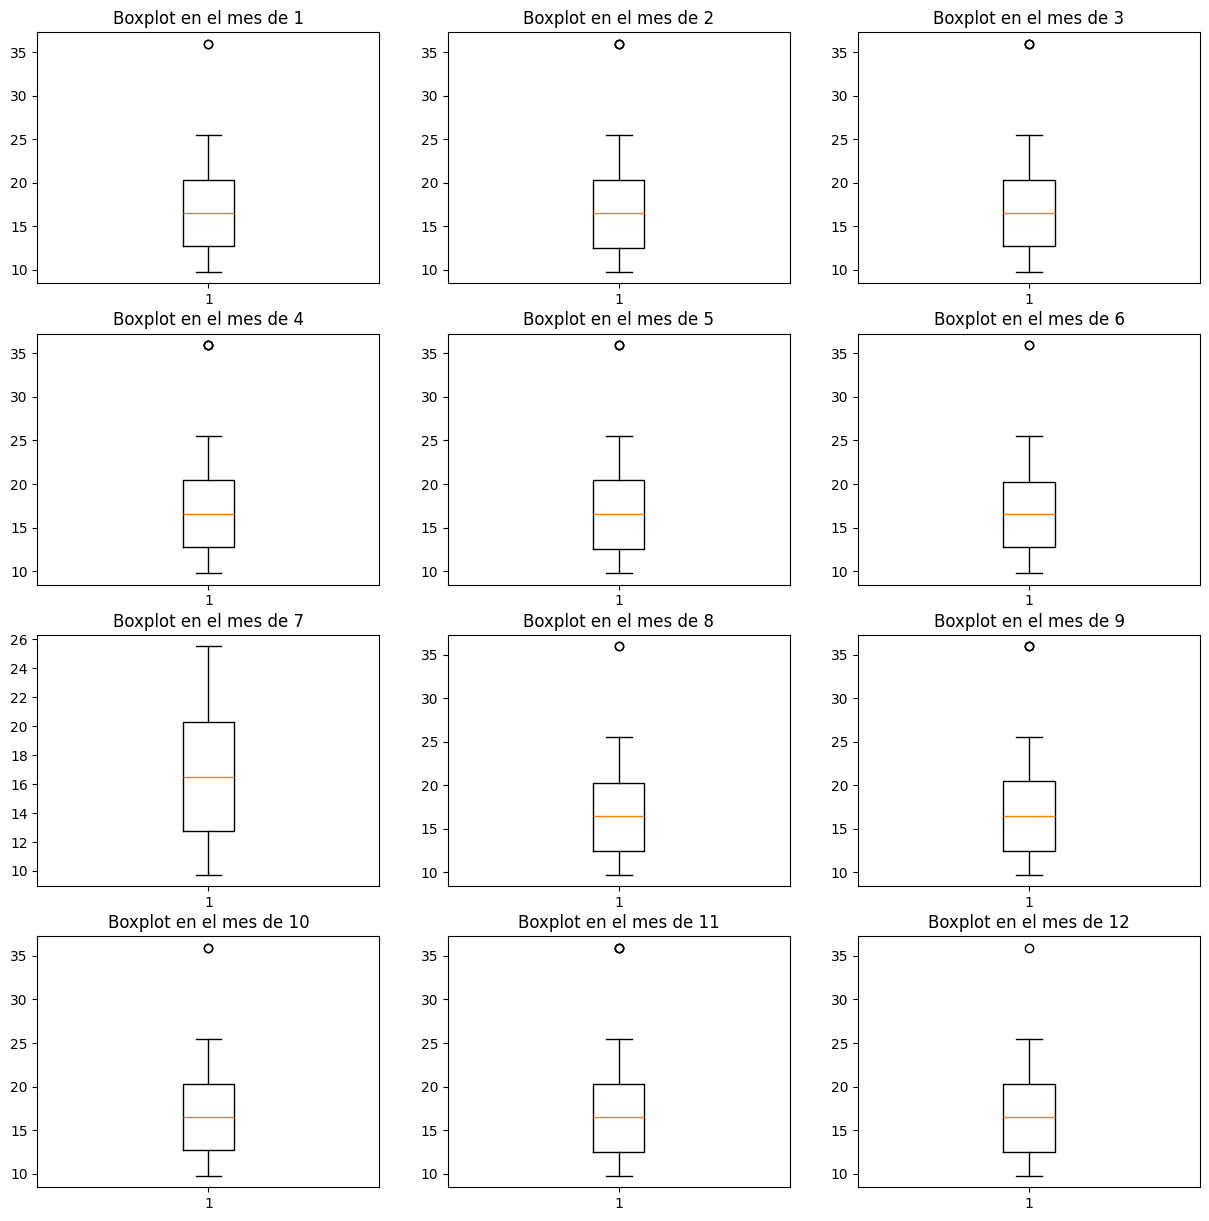

In [21]:
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%Y')

contador = 1

fig,axs = plt.subplots(4,3, figsize=(15,15))


for x in range(4):
        for y in range(3):
            if contador <= 12:
                meses = df[df['date'].dt.month == contador]['price']
                axs[x,y].boxplot(meses)
                axs[x,y].set_title(f'Boxplot en el mes de {contador}')
                
                contador += 1

plt.show()
